In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d60d65157098169a6d77977f3c1202aa


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1




# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1       
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | beloha
Processing Record 5 of Set 1 | chimore
Processing Record 6 of Set 1 | tallahassee
Processing Record 7 of Set 1 | vao
Processing Record 8 of Set 1 | saleaula
City not found. Skipping...
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 12 of Set 1 | alexandria
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | tutoia
Processing Record 17 of Set 1 | charlottesville
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | vila franca do campo
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | carnarvon
Processing Record 22

City not found. Skipping...
Processing Record 36 of Set 4 | urumqi
Processing Record 37 of Set 4 | kavaratti
Processing Record 38 of Set 4 | sterling
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | cockburn town
Processing Record 41 of Set 4 | rapid city
Processing Record 42 of Set 4 | benguela
Processing Record 43 of Set 4 | bam
Processing Record 44 of Set 4 | curanilahue
Processing Record 45 of Set 4 | ocos
Processing Record 46 of Set 4 | porto belo
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | gadung
Processing Record 49 of Set 4 | skibbereen
Processing Record 50 of Set 4 | cidreira
Processing Record 1 of Set 5 | saint-martin-boulogne
Processing Record 2 of Set 5 | anloga
Processing Record 3 of Set 5 | charters towers
Processing Record 4 of Set 5 | anadyr
Processing Record 5 of Set 5 | tamiahua
Processing Record 6 of Set 5 | singaparna
Processing Record 7 of Set 5 | garowe
Processing Record 8 of Set 5 | pemangkat
Processing Record

Processing Record 28 of Set 8 | conakry
Processing Record 29 of Set 8 | schubelbach
Processing Record 30 of Set 8 | lamar
Processing Record 31 of Set 8 | ignacio zaragoza
Processing Record 32 of Set 8 | san francisco
Processing Record 33 of Set 8 | bueno brandao
Processing Record 34 of Set 8 | jurado
Processing Record 35 of Set 8 | san pedro
Processing Record 36 of Set 8 | luwuk
Processing Record 37 of Set 8 | honiara
Processing Record 38 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | nizhniy ingash
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | puerto cabezas
Processing Record 43 of Set 8 | oum hadjer
Processing Record 44 of Set 8 | batagay
Processing Record 45 of Set 8 | asau
Processing Record 46 of Set 8 | brejo santo
Processing Record 47 of Set 8 | lucea
Processing Record 48 of Set 8 | ostrovnoy
Processing Record 49 of Set 8 | san andres
Processing Record 50 of Set 8 | algiers
Proc

Processing Record 16 of Set 12 | morogoro
Processing Record 17 of Set 12 | bad munstereifel
Processing Record 18 of Set 12 | sungairaya
Processing Record 19 of Set 12 | gimli
Processing Record 20 of Set 12 | liloan
Processing Record 21 of Set 12 | jesus de otoro
Processing Record 22 of Set 12 | qui nhon
Processing Record 23 of Set 12 | sioux lookout
Processing Record 24 of Set 12 | qafsah
City not found. Skipping...
Processing Record 25 of Set 12 | viking
Processing Record 26 of Set 12 | paciran
Processing Record 27 of Set 12 | luau
Processing Record 28 of Set 12 | lundazi
Processing Record 29 of Set 12 | lumphat
Processing Record 30 of Set 12 | hirado
Processing Record 31 of Set 12 | rocha
Processing Record 32 of Set 12 | san rafael
Processing Record 33 of Set 12 | gillette
Processing Record 34 of Set 12 | spencer
Processing Record 35 of Set 12 | san patricio
Processing Record 36 of Set 12 | kandrian
Processing Record 37 of Set 12 | el retorno
Processing Record 38 of Set 12 | iralaya


In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paamiut,61.99,-49.67,45.99,91,100,12.37,GL,2020-08-01 15:53:31
1,Mahebourg,-20.41,57.70,73.40,78,75,10.29,MU,2020-08-01 15:53:31
2,Busselton,-33.65,115.33,48.00,78,78,3.09,AU,2020-08-01 15:53:31
3,Beloha,-25.17,45.05,61.59,70,0,10.63,MG,2020-08-01 15:53:31
4,Chimore,-16.98,-65.13,89.37,35,75,0.94,BO,2020-08-01 15:53:31
5,Tallahassee,30.44,-84.28,87.01,74,40,2.42,US,2020-08-01 15:52:57
6,Vao,-22.67,167.48,66.22,69,46,18.45,NC,2020-08-01 15:53:31
7,Tasiilaq,65.61,-37.64,53.60,55,20,5.82,GL,2020-08-01 15:53:31
8,Ancud,-41.87,-73.82,52.00,87,90,17.22,CL,2020-08-01 15:53:32
9,Alexandria,31.22,29.96,86.00,66,40,9.17,EG,2020-08-01 15:53:32


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2020-08-01 15:53:31,61.99,-49.67,45.99,91,100,12.37
1,Mahebourg,MU,2020-08-01 15:53:31,-20.41,57.70,73.40,78,75,10.29
2,Busselton,AU,2020-08-01 15:53:31,-33.65,115.33,48.00,78,78,3.09
3,Beloha,MG,2020-08-01 15:53:31,-25.17,45.05,61.59,70,0,10.63
4,Chimore,BO,2020-08-01 15:53:31,-16.98,-65.13,89.37,35,75,0.94


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time

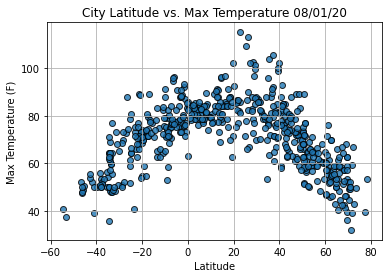

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

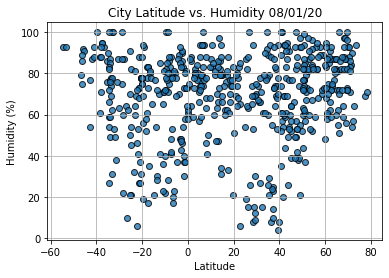

In [17]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

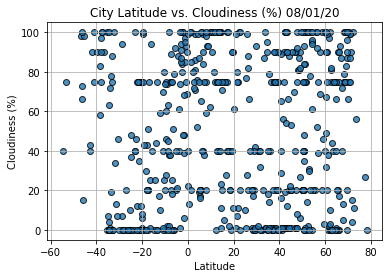

In [18]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

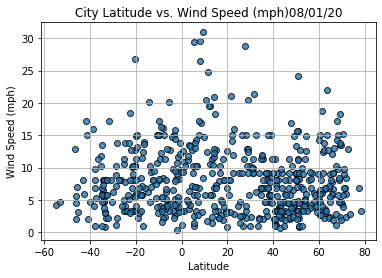

In [19]:
# Build the scatter plot for latitude vs. Windspeed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph)"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [31]:


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

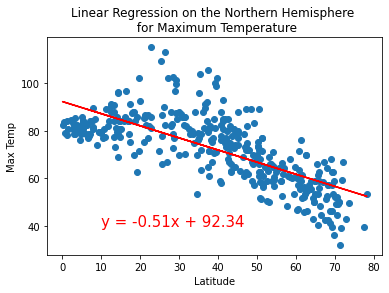

In [32]:
# Linear regression on the Northern Hemisphere: Latitude vs. Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

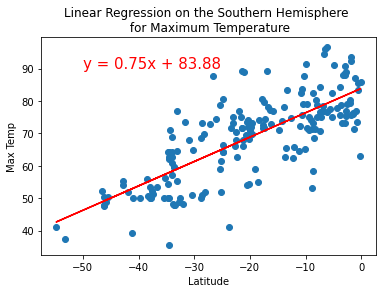

In [35]:
# Linear regression on the Southern Hemisphere: Latitude vs. Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

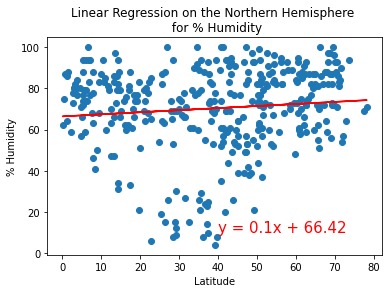

In [37]:
# Linear regression on the Northern Hemisphere: Latitude vs. % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

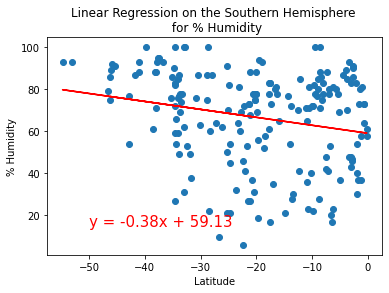

In [39]:
# Linear regression on the Southern Hemisphere: Latitude vs. % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

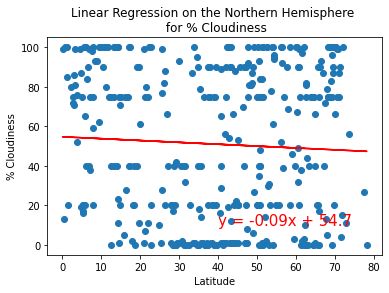

In [40]:
# Linear regression on the Northern Hemisphere: Latitude vs. % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

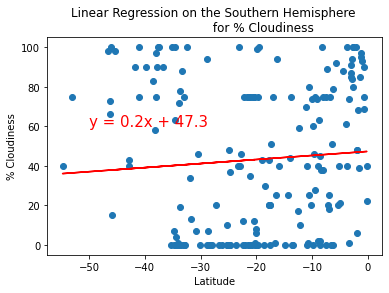

In [49]:
# Linear regression on the Southern Hemisphere: Latitude vs. % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n                         for % Cloudiness', '% Cloudiness',(-50,60))

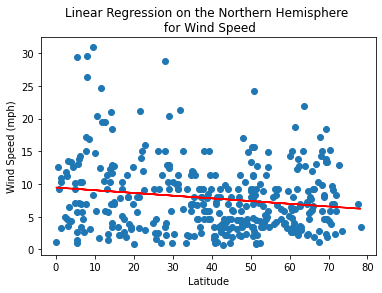

In [56]:
# Linear regression on the Northern Hemisphere: Latitude vs. Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (40,35))

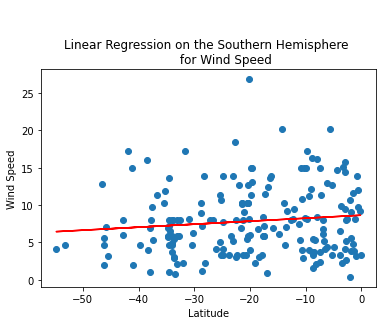

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n         for Wind Speed', 'Wind Speed',(-50,35))